In [3]:
import h3
from shapely import wkt
import urbanity as urb
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon

c:\Users\20228\Anaconda3\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [10]:
sg_gdf = gpd.read_file('../shapefile/singapore_4326.geojson')


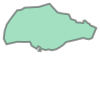

In [11]:
sg_gdf.geometry.values[0]

In [12]:

# 通过指定地理范围和六边形分辨率获取六边形ID
hexagon_ids = h3.polyfill(sg_gdf.geometry[0].__geo_interface__, 8, geo_json_conformant = True)

# 自定义函数，将每个六边形ID转换为有效的Shapely多边形

polygonise = lambda hex_id: Polygon(
                                h3.h3_to_geo_boundary(
                                    hex_id, geo_json=True)
                                    )

# 将自定义函数应用于六边形ID列表，生成对应的Shapely多边形对象，并存储在GeoSeries中
hexagonal_polygons = gpd.GeoSeries(list(map(polygonise, hexagon_ids)), 
                                      index=hexagon_ids, 
                                      crs="EPSG:4326" 
                                     )

<Axes: >

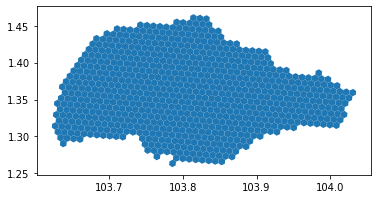

In [13]:
hexagonal_polygons.plot()

In [14]:
### 1.将六边形几何列表转换为Geopandas的Geodataframe对象。

# 创建一个空的Geopandas的Geodataframe对象，使用EPSG:4326坐标参考系统，并将几何数据设为hexagonal_polygons列表
hex_gdf = gpd.GeoDataFrame(data=None, crs="EPSG:4326", geometry = hexagonal_polygons)


# 重置索引，将六边形多边形id列表移动到一个单独的列中

hex_gdf = hex_gdf.reset_index()

# 重命名列名，以便后续进行空间叠加操作
hex_gdf.columns = ['hexid', 'geometry']

In [15]:
hex_gdf.head()


,hexid,geometry
0,886526360bfffff,"POLYGON ((103.88510 1.36829, 103.88560 1.37338..."
1,88652636a9fffff,"POLYGON ((103.83888 1.39497, 103.83938 1.40005..."
2,886520d869fffff,"POLYGON ((103.84449 1.27157, 103.84499 1.27666..."
3,886520d917fffff,"POLYGON ((103.82771 1.32667, 103.82821 1.33175..."
4,886520c80bfffff,"POLYGON ((103.69993 1.38277, 103.70043 1.38786..."


In [20]:
### Step 2: Loading network node and edge information

# Load Singapore 100m node attributes from the Global Urban Network (GUN) dataset
singapore_100m_nodes = gpd.read_file('../data/Singapore_nodes_100m.geojson')

# Load Singapore 100m edge attributes from the Global Urban Network (GUN) dataset
singapore_100m_edges = gpd.read_file('../data/Singapore_edges_100m.geojson')

# Convert edges geometry from string (due to csv storage) to shapely linestring object. Note: csv was used to facilitate storing of tuple valued columns. 
singapore_100m_edges['geometry'] = singapore_100m_edges['geometry'].apply(wkt.loads)

# Return a new dataframe with start node (u), end node (v), length in metres, and linestring geometry
singapore_100m_edges = gpd.GeoDataFrame(data = {'u':singapore_100m_edges['u'], 
                                          'v':singapore_100m_edges['v'], 
                                          'length':singapore_100m_edges['length']},
                                    crs="EPSG:4326", 
                                    geometry = singapore_100m_edges['geometry'])

TypeError: Expected bytes or string, got LineString

In [22]:
from shapely.geometry import LineString

# Load Singapore 100m node attributes from the Global Urban Network (GUN) dataset
singapore_100m_nodes = gpd.read_file('../data/Singapore_nodes_100m.geojson')

# Load Singapore 100m edge attributes from the Global Urban Network (GUN) dataset
singapore_100m_edges = gpd.read_file('../data/Singapore_edges_100m.geojson')

# Convert edges geometry to LineString objects
singapore_100m_edges['geometry'] = singapore_100m_edges['geometry'].apply(lambda x: LineString(x['coordinates']))

# Return a new dataframe with start node (u), end node (v), length in meters, and linestring geometry
singapore_100m_edges = gpd.GeoDataFrame(data={'u': singapore_100m_edges['u'],
                                              'v': singapore_100m_edges['v'],
                                              'length': singapore_100m_edges['length']},
                                        crs="EPSG:4326",
                                        geometry=singapore_100m_edges['geometry'])

TypeError: 'LineString' object is not subscriptable

In [23]:
from shapely.geometry import LineString

# Load Singapore 100m node attributes from the Global Urban Network (GUN) dataset
singapore_100m_nodes = gpd.read_file('../data/Singapore_nodes_100m.geojson')

# Load Singapore 100m edge attributes from the Global Urban Network (GUN) dataset
singapore_100m_edges = gpd.read_file('../data/Singapore_edges_100m.geojson')

# Convert edges geometry to LineString objects
singapore_100m_edges['geometry'] = singapore_100m_edges['geometry'].apply(lambda x: LineString(x['coordinates']))

# Return a new dataframe with start node (u), end node (v), length in meters, and linestring geometry
singapore_100m_edges = gpd.GeoDataFrame(data={'u': singapore_100m_edges['u'],
                                              'v': singapore_100m_edges['v'],
                                              'length': singapore_100m_edges['length']},
                                        crs="EPSG:4326",
                                        geometry=singapore_100m_edges['geometry'])

TypeError: 'LineString' object is not subscriptable

In [24]:
from shapely.geometry import LineString

#  加载全球城市网络(Global Urban Network, GUN)数据集中的新加坡100米节点属性
singapore_100m_nodes = gpd.read_file('../data/Singapore_nodes_100m.geojson')

# 加载全球城市网络(Global Urban Network, GUN)数据集中的新加坡100米边属性
singapore_100m_edges = gpd.read_file('../data/Singapore_edges_100m.geojson')

# 将边的几何信息转换为LineString对象
singapore_100m_edges['geometry'] = singapore_100m_edges['geometry'].apply(LineString)
#
## 创建一个新的Geodataframe对象，包含起始节点（u）、终止节点（v）、长度（以米为单位）和LineString几何对象
singapore_100m_edges = gpd.GeoDataFrame(data={'u': singapore_100m_edges['u'],
                                              'v': singapore_100m_edges['v'],
                                              'length': singapore_100m_edges['length']},
                                        crs="EPSG:4326",
                                        geometry=singapore_100m_edges['geometry'])

In [27]:
singapore_100m_nodes.columns


Index(['node_id', 'osmid', 'x', 'y', 'Node Density', 'Street Length', 'Degree',
       'Clustering', 'Clustering (Weighted)', 'Closeness Centrality',
       'Betweenness Centrality', 'Eigenvector Centrality', 'Katz Centrality',
       'PageRank', 'Footprint Proportion', 'Footprint Mean', 'Footprint Stdev',
       'Perimeter Total', 'Perimeter Mean', 'Perimeter Stdev',
       'Complexity Mean', 'Complexity Stdev', 'Building Count', 'PopSum',
       'Men', 'Women', 'Elderly', 'Youth', 'Children', 'Civic', 'Commercial',
       'Entertainment', 'Food', 'Healthcare', 'Institutional', 'Recreational',
       'Social', 'Green View Mean', 'Green View Stdev', 'Sky View Mean',
       'Sky View Stdev', 'Building View Mean', 'Building View Stdev',
       'Road View Mean', 'Road View Stdev', 'Visual Complexity Mean',
       'Visual Complexity Stdev', 'geometry'],
      dtype='object')

In [28]:
singapore_100m_nodes.head()[['osmid','x','y','Green View Stdev','geometry']]


,osmid,x,y,Green View Stdev,geometry
0,4748500344,103.830061,1.306018,0.128703,POINT (103.83006 1.30602)
1,6427627507,103.830112,1.305992,0.136336,POINT (103.83011 1.30599)
2,74355703,103.839288,1.313432,0.162048,POINT (103.83929 1.31343)
3,2666453628,103.839495,1.313585,0.161321,POINT (103.83949 1.31359)
4,3181999572,103.839882,1.313886,0.119944,POINT (103.83988 1.31389)


In [29]:
singapore_100m_edges.head()



,u,v,length,geometry
0,4748500344,6427627507,6.321,"LINESTRING (103.83006 1.30602, 103.83011 1.30599)"
1,4748500344,6330272156,18.593,"LINESTRING (103.82991 1.30610, 103.83006 1.30602)"
2,4748500344,4748500339,40.520,"LINESTRING (103.83006 1.30602, 103.83008 1.306..."
3,6427627507,4748500344,6.321,"LINESTRING (103.83006 1.30602, 103.83011 1.30599)"
4,6427627507,4748500346,19.905,"LINESTRING (103.83011 1.30599, 103.83014 1.305..."


In [30]:
#网络与h3六边形空间相交
hex_intersection = singapore_100m_edges.overlay(hex_gdf, how='intersection')
hex_intersection.head()

,u,v,length,hexid,geometry
0,4748500344,6427627507,6.321,886520d825fffff,"LINESTRING (103.83006 1.30602, 103.83011 1.30599)"
1,4748500344,6330272156,18.593,886520d825fffff,"LINESTRING (103.82991 1.30610, 103.83006 1.30602)"
2,4748500344,4748500339,40.520,886520d825fffff,"LINESTRING (103.83006 1.30602, 103.83008 1.306..."
3,6427627507,4748500344,6.321,886520d825fffff,"LINESTRING (103.83006 1.30602, 103.83011 1.30599)"
4,6427627507,4748500346,19.905,886520d825fffff,"LINESTRING (103.83011 1.30599, 103.83011 1.30599)"


In [31]:
hex_intersection.hexid.value_counts()[[0,1,2,3,4,-5,-4,-3,-2,-1]]


886520d943fffff    1070
886520db37fffff    1028
886520d90bfffff     978
886520d869fffff     978
88652636cbfffff     952
886520cb67fffff       2
88652634c3fffff       2
886520ca23fffff       2
886520ca85fffff       2
88652634d3fffff       2
Name: hexid, dtype: int64

In [32]:
# # 指定感兴趣的列
column_of_interest = ['Green View Stdev']

# 创建一个空字典，将绿化视野值映射到osmid
osmid_to_value = {}
for osmid in list(singapore_100m_nodes['osmid']):
    osmid_to_value[osmid] = {}
    
# # 将绿化视野值添加到对应的osmid键中
for col in column_of_interest:
    for oid,value in zip(list(singapore_100m_nodes['osmid']),list(singapore_100m_nodes[col])):
        osmid_to_value[oid][col] = value

In [33]:
# 使用简单的for循环来可视化我们映射osmid到绿化视野值的字典的前五行。

for i, k in enumerate(osmid_to_value.items()):
    if i < 5:
        print(k)

(4748500344, {'Green View Stdev': 0.12870257332684681})
(6427627507, {'Green View Stdev': 0.136335888008163})
(74355703, {'Green View Stdev': 0.16204782889805933})
(2666453628, {'Green View Stdev': 0.16132061204099446})
(3181999572, {'Green View Stdev': 0.11994423307362072})


In [34]:
# Simple for loop to visualise the first five rows of our dictionary that maps osmid to Green View value
for i, k in enumerate(osmid_to_value.items()):
    if i < 5:
        print(k)

(4748500344, {'Green View Stdev': 0.12870257332684681})
(6427627507, {'Green View Stdev': 0.136335888008163})
(74355703, {'Green View Stdev': 0.16204782889805933})
(2666453628, {'Green View Stdev': 0.16132061204099446})
(3181999572, {'Green View Stdev': 0.11994423307362072})


In [36]:
# 遍历每个列名

for col in column_of_interest:
    # 为u列添加绿化视野值
    hex_intersection[f'u_{col}'] = [osmid_to_value[i][col] for i in hex_intersection['u']]
    # 为v列添加绿化视野值
    hex_intersection[f'v_{col}'] = [osmid_to_value[i][col] for i in hex_intersection['v']]

In [38]:
hex_intersection.head()[['u','v','hexid','u_Green View Stdev','v_Green View Stdev', 'geometry']]


,u,v,hexid,u_Green View Stdev,v_Green View Stdev,geometry
0,4748500344,6427627507,886520d825fffff,0.128703,0.136336,"LINESTRING (103.83006 1.30602, 103.83011 1.30599)"
1,4748500344,6330272156,886520d825fffff,0.128703,0.125408,"LINESTRING (103.82991 1.30610, 103.83006 1.30602)"
2,4748500344,4748500339,886520d825fffff,0.128703,0.138060,"LINESTRING (103.83006 1.30602, 103.83008 1.306..."
3,6427627507,4748500344,886520d825fffff,0.136336,0.128703,"LINESTRING (103.83006 1.30602, 103.83011 1.30599)"
4,6427627507,4748500346,886520d825fffff,0.136336,0.136477,"LINESTRING (103.83011 1.30599, 103.83011 1.30599)"


<Axes: >

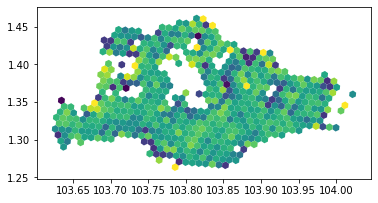

In [40]:
# 通过hexid对起始节点和结束节点属性进行分组，计算边之间的绿化视野GVI相关性
hex_correlation = hex_intersection.groupby('hexid')[['u_Green View Stdev', 'v_Green View Stdev']].corr(min_periods=30).iloc[0::2,-1]

#  删除多层索引列，并将相关性值实例化为pandas数据帧
hexagon_df = pd.DataFrame(hex_correlation).reset_index().drop(columns=['level_1'])

# 重命名数据帧列名
hexagon_df.columns = ['hexid', 'assortativity']

# # 最后一步：将相关性信息合并到hex_gdf中 
final_gdf = hex_gdf.merge(hexagon_df, on = 'hexid')

# 根据`correlation`列绘制最终数据帧
final_gdf.plot(column='assortativity')

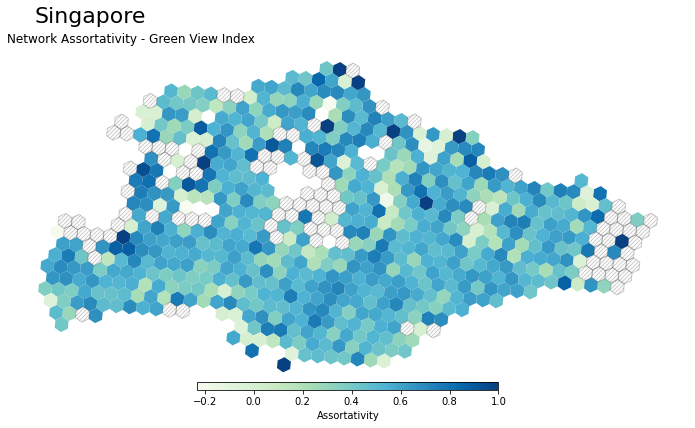

In [41]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(18, 9))

final_gdf.plot(column='assortativity', ax=ax, cmap='GnBu', legend=True, 
               legend_kwds={'label': "Assortativity",
                             'orientation': "horizontal",
                             'shrink': 0.30,
                             'anchor':(0.5, 2.2), 
                             'aspect':40, 
                             'ticks':None},
               missing_kwds={"color": "white",
                              "edgecolor": "black",
                              "hatch": "//////",
                              "alpha":0.2,
                              "label": "Missing values",
                              }
                )

ax.set_axis_off()

ax.set_title('Network Assortativity - Green View Index', fontsize=12, loc='left', pad=0)
fig.suptitle('Singapore', fontsize=22, x=0.271, y = 0.94, horizontalalignment='left')

plt.show()